# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [1]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [4]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [5]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [6]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0011975765228271484 (+/- 0.0003988296605817725)
avg score time: 0.0005976200103759765 (+/- 0.0007977034686578672)
avg test score: 0.522 (+/- 0.4397526577520595)


In [7]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.015153932571411132 (+/- 0.0014832829732446997)
avg score time: 0.002987194061279297 (+/- 0.0015333414832165823)
avg test score: nan (+/- nan)


C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 677, in predict
    predicted_probabilitiy = self.predict_proba(X)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 720, in predict_proba
    all_pro

##### 와인 데이터

In [8]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [9]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.000997781753540039 (+/- 0.0006312788590552244)
avg score time: 0.0011963367462158204 (+/- 0.00039925599459826795)
avg test score: 0.2833079963514746 (+/- 0.3484717614319225)


In [10]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 677, in predict
    predicted_probabilitiy = self.predict_proba(X)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 720, in predict_proba
    all_pro

avg fit time: 0.014964962005615234 (+/- 0.000898249134739066)
avg score time: 0.002189779281616211 (+/- 0.00040130603902691883)
avg test score: nan (+/- nan)


C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 677, in predict
    predicted_probabilitiy = self.predict_proba(X)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 720, in predict_proba
    all_pro

##### 유방암 데이터

In [11]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [12]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0007920742034912109 (+/- 0.00039620529458777)
avg score time: 0.003391265869140625 (+/- 0.0038159058742410082)
avg test score: 0.8599944875385843 (+/- 0.03865048644951847)


In [13]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 677, in predict
    predicted_probabilitiy = self.predict_proba(X)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 720, in predict_proba
    all_pro

avg fit time: 0.017552947998046874 (+/- 0.0004886944799204637)
avg score time: 0.002992057800292969 (+/- 4.422005889652111e-07)
avg test score: nan (+/- nan)


C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 677, in predict
    predicted_probabilitiy = self.predict_proba(X)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 720, in predict_proba
    all_pro

#### SVC

##### 붓꽃 데이터

In [14]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [15]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0017952442169189454 (+/- 0.00039897074732875255)
avg score time: 0.0 (+/- 0.0)
avg test score: 0.9666666666666666 (+/- 0.02108185106778919)


In [16]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.019957733154296876 (+/- 0.0008996923697065948)
avg score time: 0.0029906272888183595 (+/- 1.395105251152782e-06)
avg test score: 0.9400000000000001 (+/- 0.024944382578492935)


##### 와인 데이터

In [17]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [18]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.001383352279663086 (+/- 0.0004904639875045582)
avg score time: 0.000600433349609375 (+/- 0.0004904117660673199)
avg test score: 0.9833333333333334 (+/- 0.022222222222222233)


In [19]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.024529123306274415 (+/- 0.0037640242322780396)
avg score time: 0.003390932083129883 (+/- 0.000489181395719909)
avg test score: 0.9552380952380952 (+/- 0.02238939388254662)


##### 유방암 데이터

In [20]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [21]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.004177522659301758 (+/- 0.0003908299536140778)
avg score time: 0.001600933074951172 (+/- 0.0004930166799804145)
avg test score: 0.9736376339077782 (+/- 0.014678541667933545)


In [22]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02872910499572754 (+/- 0.0007480037457061385)
avg score time: 0.009568452835083008 (+/- 0.000483772177266749)
avg test score: 0.9578015836050303 (+/- 0.012969225768426592)


#### Decision Tree

##### 붓꽃 데이터

In [23]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [24]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0010083675384521484 (+/- 1.4867534843372404e-05)
avg score time: 0.0003991127014160156 (+/- 0.0004891862157180094)
avg test score: 0.9600000000000002 (+/- 0.03265986323710903)


In [25]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0009991645812988282 (+/- 0.0006308945098121296)
avg score time: 0.00020198822021484376 (+/- 0.0004039764404296875)
avg test score: 0.9666666666666668 (+/- 0.036514837167011066)


##### 와인 데이터

In [26]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [27]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0011980533599853516 (+/- 0.00040771146933685367)
avg score time: 0.0001995086669921875 (+/- 0.000399017333984375)
avg test score: 0.8765079365079365 (+/- 0.054360386774651846)


In [28]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.019742631912231447 (+/- 0.00038289978079572573)
avg score time: 0.001995277404785156 (+/- 1.7132593865982057e-05)
avg test score: 0.9495238095238095 (+/- 0.020711700866516903)


##### 유방암 데이터

In [29]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [30]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0055958271026611325 (+/- 0.0008101198737689016)
avg score time: 0.00039353370666503904 (+/- 0.00048204844475242944)
avg test score: 0.9226051855301971 (+/- 0.027677338835582134)


In [31]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.025945568084716798 (+/- 1.323306880052241e-05)
avg score time: 0.0019895553588867186 (+/- 1.1433556793899781e-05)
avg test score: 0.9455208818506444 (+/- 0.02442979039475862)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [32]:
boston = load_boston()
diabetes = load_diabetes()

#### KNN

##### 보스턴 주택 가격 데이터

In [33]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [34]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0015991687774658202 (+/- 0.0004920064536119487)
avg score time: 0.0013915538787841798 (+/- 0.0004901310686572966)
avg test score: 0.47357748833823543 (+/- 0.13243123464477455)


In [35]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.015969038009643555 (+/- 0.001097936500650966)
avg score time: 0.007175922393798828 (+/- 0.0003874059669550965)
avg test score: 0.3528211229461461 (+/- 0.2075730969132474)


##### 당뇨병 데이터

In [36]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [37]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0014002323150634766 (+/- 0.0004849032767105588)
avg score time: 0.0011975288391113282 (+/- 0.00040874086245481253)
avg test score: 0.3689720650295623 (+/- 0.044659049060165365)


In [38]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.015755701065063476 (+/- 0.001175699365091522)
avg score time: 0.006784820556640625 (+/- 0.0003984317188370913)
avg test score: 0.3721905503639235 (+/- 0.0637579415261224)


#### SVR

##### 보스턴 주택 가격 데이터

In [39]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [40]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.010376358032226562 (+/- 0.0013516963623588284)
avg score time: 0.003989171981811523 (+/- 8.17605409597504e-07)
avg test score: 0.17631266230186618 (+/- 0.5224914915128981)


In [41]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03609800338745117 (+/- 0.0009795370727915024)
avg score time: 0.019549226760864256 (+/- 0.0004870513004113063)
avg test score: 0.128349161935504 (+/- 0.32018395365467295)


##### 당뇨병 데이터

In [42]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [43]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0069827079772949215 (+/- 1.6292626281019143e-05)
avg score time: 0.0031853199005126955 (+/- 0.00040259995218879386)
avg test score: 0.14659936199629428 (+/- 0.021907980033429305)


In [44]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.031113624572753906 (+/- 0.0007366298115776291)
avg score time: 0.015759086608886717 (+/- 0.0003965804392230344)
avg test score: 0.07227571934564399 (+/- 0.020823040587675933)


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [45]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [46]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.003383970260620117 (+/- 0.0007858539896314674)
avg score time: 0.0005986213684082032 (+/- 0.0004887725874447879)
avg test score: 0.10941396108039259 (+/- 0.8294512686932437)


In [47]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.021854209899902343 (+/- 0.001115862062087639)
avg score time: 0.002000761032104492 (+/- 1.0302772764839495e-05)
avg test score: 0.5014577772381829 (+/- 0.30118149029799124)


##### 당뇨병 데이터

In [48]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [49]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0023851394653320312 (+/- 0.0007866803740286789)
avg score time: 0.0002013683319091797 (+/- 0.0004027366638183594)
avg test score: -0.15902205468618763 (+/- 0.10154740130319272)


In [50]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.022558164596557618 (+/- 0.00205864679064146)
avg score time: 0.0015915393829345702 (+/- 0.00048432135846744644)
avg test score: 0.39765998095501454 (+/- 0.055854725700984376)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [51]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

In [52]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [53]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09383220672607422 (+/- 0.0025880930830938583)
avg score time: 0.007971906661987304 (+/- 0.0006161351217496995)
avg test score: 0.9666666666666668 (+/- 0.02108185106778919)


In [54]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09793739318847657 (+/- 0.0007446229793506178)
avg score time: 0.0073817729949951175 (+/- 0.0004986506109137338)
avg test score: 0.9665079365079364 (+/- 0.032368500562618134)


In [55]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.13501625061035155 (+/- 0.0015364169726687423)
avg score time: 0.0077854633331298825 (+/- 0.0004018272130637724)
avg test score: 0.9613569321533924 (+/- 0.022578554632834247)


### Random Forests 회귀

In [56]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [57]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.21712093353271483 (+/- 0.006175807416355349)
avg score time: 0.007780981063842773 (+/- 0.001595608701071336)
avg test score: 0.6271185661877512 (+/- 0.2058674457085487)


In [58]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.17473988533020018 (+/- 0.002902408626831184)
avg score time: 0.006770896911621094 (+/- 0.00040763445722191564)
avg test score: 0.4239617227710618 (+/- 0.04410696568169781)


### Extremely Randomized Trees 분류

In [59]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [60]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07181248664855958 (+/- 0.004143654173723131)
avg score time: 0.007778644561767578 (+/- 0.0004113334803381061)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


In [61]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07312221527099609 (+/- 0.0014316950939921886)
avg score time: 0.007384824752807617 (+/- 0.0004829489364866347)
avg test score: 0.9833333333333332 (+/- 0.022222222222222233)


In [62]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08468799591064453 (+/- 0.0006806311761415652)
avg score time: 0.00857090950012207 (+/- 0.00048512394018714326)
avg test score: 0.9666200900481291 (+/- 0.015070413366127156)


### Extremely Randomized Trees 회귀

In [63]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [64]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.13897099494934081 (+/- 0.0014558951897245982)
avg score time: 0.006985664367675781 (+/- 9.243756121380886e-06)
avg test score: 0.633866986883725 (+/- 0.24191679326906368)


In [65]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.12068648338317871 (+/- 0.0006308141357419312)
avg score time: 0.0070911884307861325 (+/- 0.00022709319472570357)
avg test score: 0.44544459324792396 (+/- 0.04088559032005795)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [66]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [67]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [68]:
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None), 
         RandomForestClassifier(n_estimators=n_estimators),
         ExtraTreesClassifier(n_estimators=n_estimators)]

<ipython-input-69-4aebf8a412c1>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 3, plot_idx)
<ipython-input-69-4aebf8a412c1>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 3, plot_idx)
<ipython-input-69-4aebf8a412c1>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always

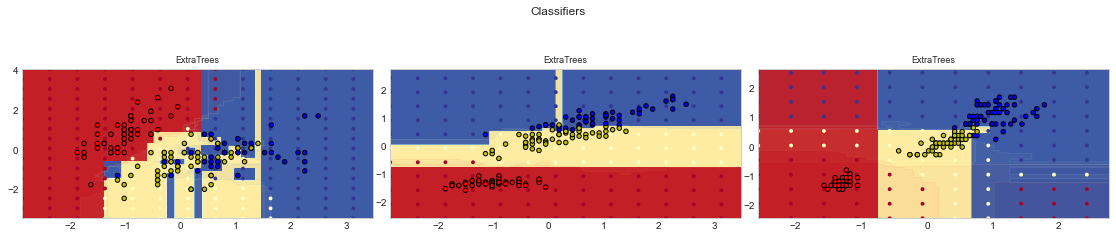

In [69]:
plt.figure(figsize=(16, 8))

for pair in ([0, 1], [0, 2], [2, 3]):
    
    for model in models:
        
        X = iris.data[:, pair]
        y = iris.target
        
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X-mean) / std
        
        model.fit(X, y)
        
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
        
        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)
            
        x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
        y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
                             
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)
            
    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                          yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                           c=Z_points_coarser, cmap=cmap,
                           edgecolors='none')
    plt.scatter(X[:, 0], X[:, 1], c=y,
               cmap=ListedColormap(['r', 'y', 'b']),
               edgecolor='k', s=20)
    plot_idx += 1
    
plt.suptitle("Classifiers", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

In [85]:
plt_idx = 1
models =[DecisionTreeRegressor(max_depth=None),
        RandomForestRegressor(n_estimators=n_estimators),
        ExtraTreesRegressor(n_estimators=n_estimators)]

In [87]:
plt. figure(figsize=(16, 8))

for pair in (0, 1, 2):
    
    for model in models:
        
        X = boston.data[:, pair]
        y = boston.target
        
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        mean = X.mean(axis=0)
        std = X.std(axis=0)    
        X = (X - mean) / std
        
        model.fit(X.reshape(-1, 1), y)
        
        model_title = str(type(model)).split(".")[-1][:-2][:-len('Regressor')]
        
        plt.subplot(3, 3, plot_idx)
        if plot_idx <=len(models):
            plt.title(model_title, fontsize=9)
            
        x_min, x_max = X.min()-1, X.max()+1
        y_min, y_max = y.min()-1, y.max()+1
        xx, yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)
        
        if isinstance(model, DecisionTreeRegressor):
            Z = model.predict(xx.reshape(-1, 1))
            cs = plt.plot(xx, Z)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(xx.reshape(-1, 1))
                cs = plt.plot(xx, Z, alpha=estimator_alpha)
                
        plt.scatter(X, y, edgecolors='k', s=20)
        plot_idx += 1
        
plt.suptitle("Regressor", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

ValueError: num must be 1 <= num <= 9, not 10

<Figure size 1152x576 with 0 Axes>

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

### AdaBoost 분류

### AdaBoost 회귀

## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

### Gradient Tree Boosting 분류

### Gradient Tree Boosting 회귀

## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

### 결정 경계 시각화

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

### 회귀식 시각화

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

#### 회귀식 시각화

### 스택 분류

#### 결정 경계 시각화